## Exercício: Análise Exploratória de Dados com Python

Neste exercício, você vai realizar uma análise exploratória em um dos mais famosos datasets para Machine Learning, o dataset iris com informações sobre 3 tipos de plantas. Esse dataset é comumente usado em problemas de Machine Learning de classificação, quando nosso objetivo é prever a classe dos dados. No caso deste dataset, prever a categoria de uma planta a partir de medidas da planta (sepal e petal).

Em cada célula, você encontra a tarefa a ser realizada. Faça todo o exercício e depois compare com a solução proposta.

Dataset (já disponível com o Scikit-Learn): https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
# Imports
import time
import numpy as np
import pandas as pd
import matplotlib as mat
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [2]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Extração e Transformação de Dados

In [16]:
# Imprima os valores categoricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica

# imprimindo os valores categoricos do target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [19]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2

# imprimindo os valores numericos do target
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [80]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)

# incluindo a coluna target_name
df['target_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [66]:
# Inclua no dataset uma coluna com os valores numéricos da variável target

# incluindo a coluna target
df['target'] = iris.target

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,versicolor,0
2,4.7,3.2,1.3,0.2,virginica,0
3,4.6,3.1,1.5,0.2,NaN,0
4,5.0,3.6,1.4,0.2,NaN,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,NaN,2
146,6.3,2.5,5.0,1.9,NaN,2
147,6.5,3.0,5.2,2.0,NaN,2
148,6.2,3.4,5.4,2.3,NaN,2


In [92]:
# Extraia as features (atributos) do dataset e imprime

df1 = df.drop(columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
df = df.drop(columns = ['target', 'target_name'])
df1

,target,target_name
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


In [96]:
# Calcule a média de cada feature para as 3 classes
print(df.mean())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


## Exploração de Dados

In [97]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)

df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


In [98]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [99]:
# Faça um resumo estatístico do dataset

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [123]:
# Verifique se existem valores nulos no dataset

pd.isnull(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [126]:
# Faça uma contagem de valores de sepal length

df['sepal length (cm)'].count()

150

## Plot

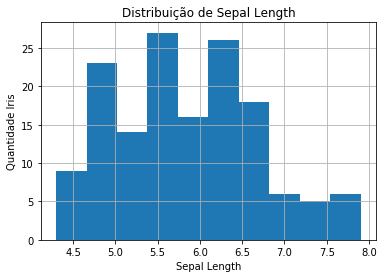

In [138]:
# Crie um Histograma de sepal length

df['sepal length (cm)'].hist()
plt.xlabel('Sepal Length')
plt.ylabel('Quantidade Iris')
plt.title('Distribuição de Sepal Length')
plt.show()

No handles with labels found to put in legend.


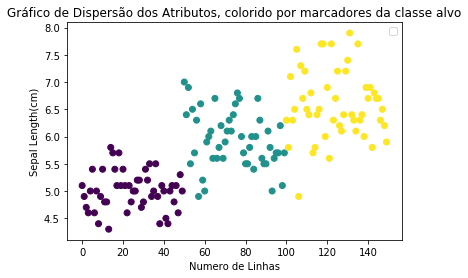

In [201]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target

x = range(len(df))
y = df['sepal length (cm)']

plt.scatter(x, y, c = df1['target'])
plt.xlabel('Numero de Linhas')
plt.ylabel('Sepal Length(cm)')
plt.title('Gráfico de Dispersão dos Atributos, colorido por marcadores da classe alvo')
plt.legend()
plt.show()

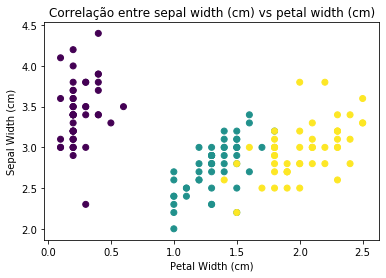

In [166]:
# Crie um Scatter Plot de 2 Features (atributos)

x = df['petal width (cm)']
y = df['sepal width (cm)']

plt.scatter(x, y, c = df1['target'])
plt.xlabel('Petal Width (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Correlação entre sepal width (cm) vs petal width (cm)')
plt.show()

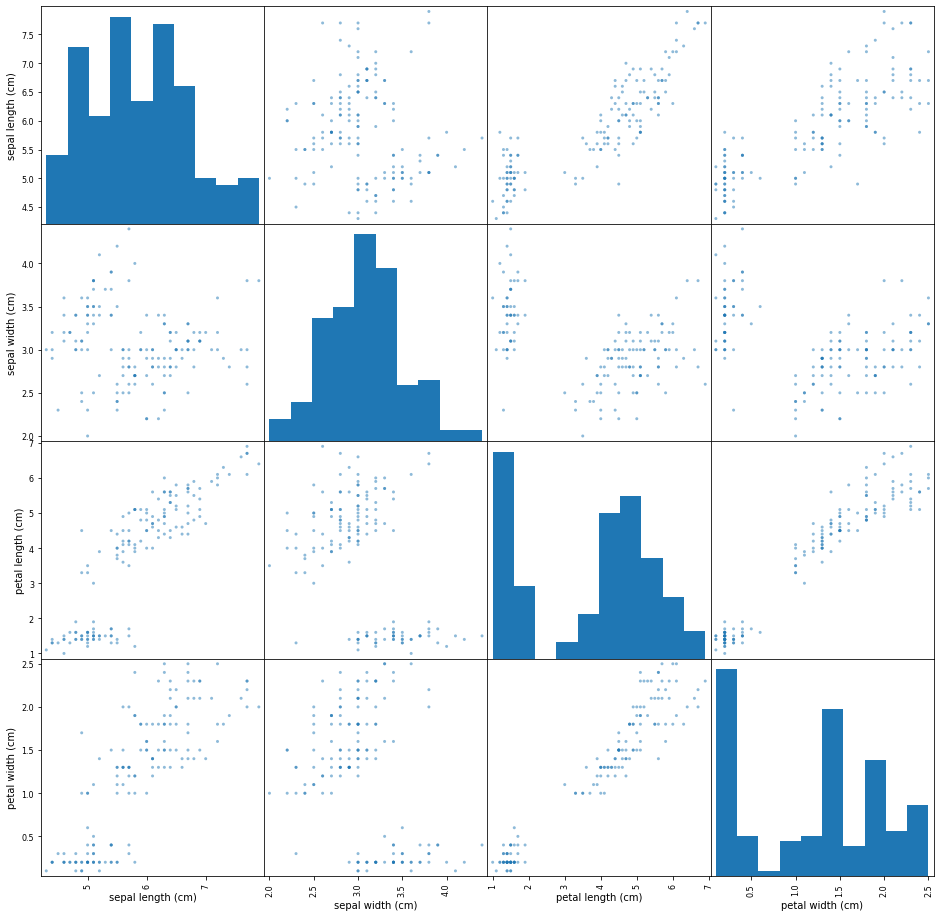

In [198]:
# Crie um Scatter Matrix das Features (atributos)

pd.plotting.scatter_matrix(df, figsize = (16, 16))
plt.show()

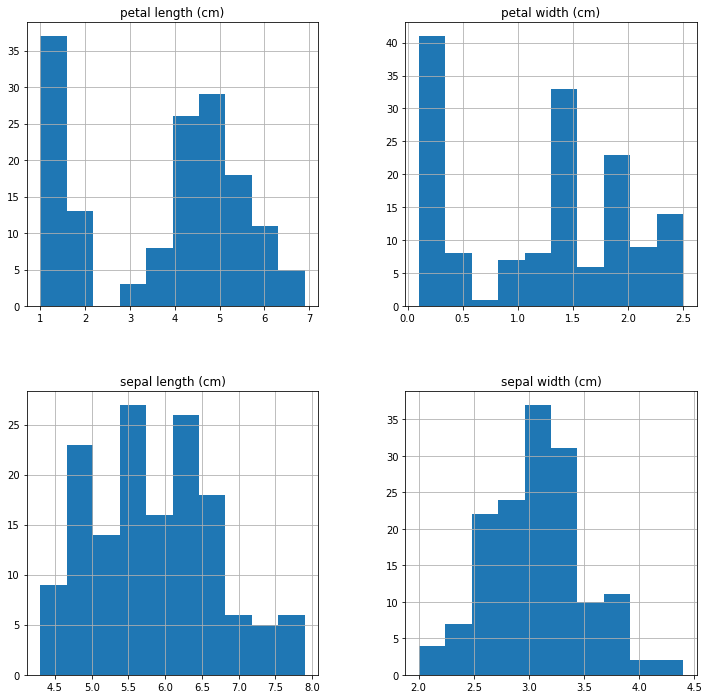

In [193]:
# Crie um Histograma de todas as features

df.hist(figsize=(12,12))

plt.show()